In [1]:
import pandas as pd
from source.classes import FPL_data
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_selection import r_regression, f_regression, mutual_info_regression

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
data_fpath = '/Users/nick/PycharmProjects/FPL_project/data/performance_data_GW4.csv'
data_df = pd.read_csv(data_fpath)

In [ ]:
# parse data input for ML input
# should turn this into a function eventually (part of the class)
stats_of_interest = ['element',
                     'total_points',
                     'opponent_team',
                     'was_home',
                     'opponent_strength',
                     'oppoenet_attack',
                     'opponent_defense',
                     'form',
                     'preround_total_points',
                     'transfers_reduced',
                     'average_points',
                     'preround_influence',
                     'preround_creativity',
                     'preround_threat',
                     'preround_ict',
                     'value'
                     ]

ML_in = data_df[stats_of_interest].sort_values(by = ['element'])

home = []
for i in list(ML_in['was_home']):
    if i:
        home.append(1)
    else:
        home.append(0)
ML_in['was_home'] = home

In [ ]:
# remove element column
ML_in = ML_in.drop(labels = ['element'], axis = 1)

# remove first appearances
ML_in = ML_in[ML_in['form'] != 0]

In [2]:
gg = FPL_data()

In [ ]:
# test different K Neighbors
fig, axes = plt.subplots(nrows=1, ncols=8, sharey=True)
y = 0

for w, n in itertools.product(['uniform','distance'], [5, 10, 15, 20]):
    gg.build_knn(type_scaler = 'range', weights = w)
    print('KNN', w, n)
    gg.predict('knn')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['knn'], color = 'r')
    axes[y].set_title(f'KNN - {w}, {n}')
    y += 1

In [ ]:
gg.knn_regression.score(gg.data_dict['X_test']['reduced'], gg.data_dict['y_test']['raw'])

In [ ]:
# test different SVR kernels
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
x = 0
y = 0

for k in ['rbf', 'linear', 'poly']: #, 'sigmoid']:
    gg.build_svr(type_scaler = 'range', kernel_type = k, feature_selection = r_regression)
    print('SVR ', k)
    gg.predict('svr')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['svr'], color = 'r')
    axes[y].set_title(f'SVR - {k}')
    y += 1

In [ ]:
# test different SVR kernels
fig, axes = plt.subplots(nrows=1, ncols=8, sharey=True)
x = 0
y = 0

for k in ['rbf', 'linear', 'poly']: #, 'sigmoid']:
    gg.build_svr(type_scaler = 'range', kernel_type = k, feature_selection = r_regression)
    print('SVR ', k)
    gg.predict('svr')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['svr'], color = 'r')
    axes[y].set_title(f'SVR - {k}')
    y += 1
    
    
# test different K Neighbors
for w, n in itertools.product(['uniform','distance'], [10]):
    gg.build_knn(type_scaler = 'range', weights = w)
    print('KNN', w, n)
    gg.predict('knn')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['knn'], color = 'r')
    axes[y].set_title(f'KNN - {w}, {n}')
    y += 1
    
# test different decision trees
for c in ['squared_error', 'friedman_mse', 'absolute_error']:
    gg.build_dtr(type_scaler = 'range', criterion = c)
    print('DTR', c)
    gg.predict('dtr')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['dtr'], color = 'r')
    axes[y].set_title(f'DTR - {c}')
    y += 1

In [ ]:
# test different decision trees
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
x = 0
y = 0
for c in ['squared_error', 'friedman_mse', 'absolute_error']:
    gg.build_dtr(type_scaler = 'range', criterion = c)
    print('DTR', c)
    gg.predict('dtr')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['dtr'], color = 'r')
    axes[y].set_title(f'DTR - {c}')
    y += 1

/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP <function r_regression at 0x12af9e0c0>
0.01887959183954313


/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP <function f_regression at 0x12af9e160>
0.06122339299551405


/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP <function mutual_info_regression at 0x12afc51c0>
0.03864052175341237


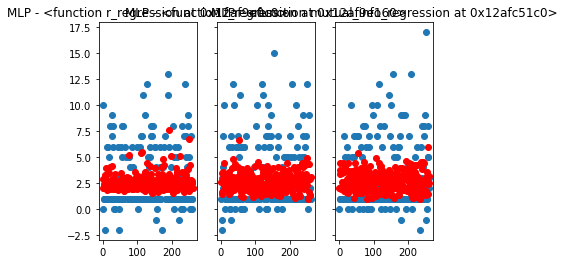

In [3]:
# test different mlp
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
x = 0
y = 0
for fs in [r_regression, f_regression, mutual_info_regression]:
    gg.build_mlp(type_scaler = 'range', feature_selection = fs)
    print('MLP', fs)
    gg.predict('mlp')
    xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
    axes[y].scatter(xx, gg.data_dict['y_test']['raw'])
    axes[y].scatter(xx, gg.data_dict['y_predicted']['mlp'], color = 'r')
    axes[y].set_title(f'MLP - {fs}')
    y += 1

In [ ]:
xx = range(1,len(gg.data_dict['y_test']['raw'])+1)
plt.scatter(xx, gg.data_dict['y_test']['raw'])
plt.scatter(xx, gg.data_dict['y_predicted']['dtr'], color = 'r')

In [37]:
from source.ML_analysis import prepare_model_input

# add position to input data
gg.input_data['position'] = [gg.player_dict[i]['element_type'] for i in gg.input_data['element']]

gg.forwards = gg.input_data[gg.input_data['position'] == 4].reset_index(drop = True)
gg.forward_ML = prepare_model_input(gg.forwards)

gg.keepers = gg.input_data[gg.input_data['position'] == 1].reset_index(drop = True)
gg.keeper_ML = prepare_model_input(gg.keepers)

gg.defenders = gg.input_data[gg.input_data['position'] == 2].reset_index(drop = True)
gg.defender_ML = prepare_model_input(gg.defenders)

gg.mids = gg.input_data[gg.input_data['position'] == 3].reset_index(drop = True)
gg.mid_ML = prepare_model_input(gg.mids)

/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.18075081043782193


/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.06150455744144723


/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0948212745711643
-0.4220030144265603


/Users/nick/opt/anaconda3/envs/FPL_project/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


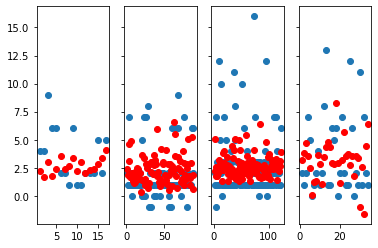

In [39]:
from source.ML_analysis import build_mlp
# build_mlp(input_df, predicted_value = 'total_points', scaler_type = 'standard', max_iter = 500, feature_selection = r_regression)
# outputs = regr, scaler, feature_selector, d_type, data
# test different mlp - with forwards only
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
y = 0
for pos in [gg.keeper_ML, gg.defender_ML, gg.mid_ML, gg.forward_ML]:
    regr, scaler, feature_selector, d_type, data = build_mlp(pos, max_iter = 1000, scaler_type = 'range', feature_selection = f_regression)
    print(regr.score(data['X_test'][d_type], data['y_test']['raw']))
    y_pred = regr.predict(data['X_test'][d_type])
    xx = range(1,len(data['y_test']['raw'])+1)
    axes[y].scatter(xx, data['y_test']['raw'])
    axes[y].scatter(xx, y_pred, color = 'r')
    #axes[y].set_title(f'MLP - {fs}')
    y += 1

In [35]:
regr.score(data['X_test'][d_type], data['y_test']['raw'])
y_pred = regr.predict(data['X_test'][d_type])

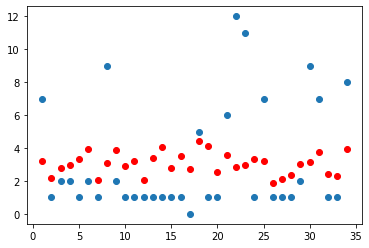

In [36]:
xx = range(1,len(data['y_test']['raw'])+1)
plt.scatter(xx, data['y_test']['raw'])
plt.scatter(xx, y_pred, color = 'r')

In [ ]:
y_scaler = preprocessing.MinMaxScaler()
y_scaler.fit(gg.y_train)

In [ ]:
from sklearn.feature_selection import r_regression, f_regression, mutual_info_regression

In [ ]:
int(6.6)

In [ ]:
int(6.2)